# ASHW 05

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ks_2samp
import scipy.stats as stats
from scipy.integrate import quad
import pandas as pd

In [19]:
#parametri
mu = 1.0
sigma = 0.02
N = 10000
#pseudo rendom - prvi put je rendom broj
#ali svaki put ce da nam bude taj isti da nam ne bi varirali rezultati
np.random.seed(0)
#parametri normalne raspodele
M_samples = np.random.normal(mu,sigma,N)
#parametri standardne normalne raspodele
#mu=0,sigma=1
hi_samples = np.random.uniform(0,1,N)

#formula: M_irr = M*\sqrt(\frac{1+\sqrt{1-\hi^2}}{2})
M_irr_samples = M_samples * np.sqrt((1+np.sqrt(1-hi_samples**2))/2)
# f = M_irr/M
f_samples = M_irr_samples/M_samples

In [45]:
# Skotovo pravilo
h_scott = 3.5 * np.std(M_irr_samples) / (len(M_irr_samples) ** (1/3))
bins_scott = int((np.max(M_irr_samples) - np.min(M_irr_samples)) / h_scott)

# Fridman - dijakonisovo pravilo
q75, q25 = np.percentile(M_irr_samples, [75 ,25])
iqr = q75 - q25
h_fd = 2 * iqr / (len(M_irr_samples) ** (1/3))
bins_fd = int((np.max(M_irr_samples) - np.min(M_irr_samples)) / h_fd)

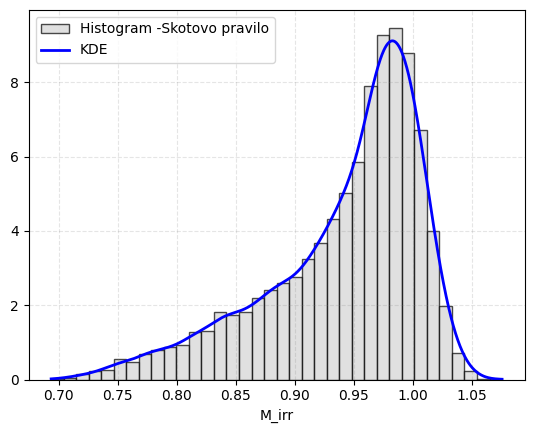

In [47]:
#sns.histplot(M_irr_samples, bins=50, stat='density', kde=True, palette='viridis')
plt.hist(M_irr_samples, bins=bins_scott, density=True, alpha=0.7,edgecolor ='black', color='lightgray', label='Histogram -Skotovo pravilo')

kde = stats.gaussian_kde(M_irr_samples)
x_vals = np.linspace(min(M_irr_samples), max(M_irr_samples), 1000)
plt.plot(x_vals, kde(x_vals), color='blue', linewidth=2,label='KDE')

plt.grid(visible=True, alpha=0.2, linestyle='--', color='gray')
plt.xlabel('M_irr')
plt.legend()
plt.show()

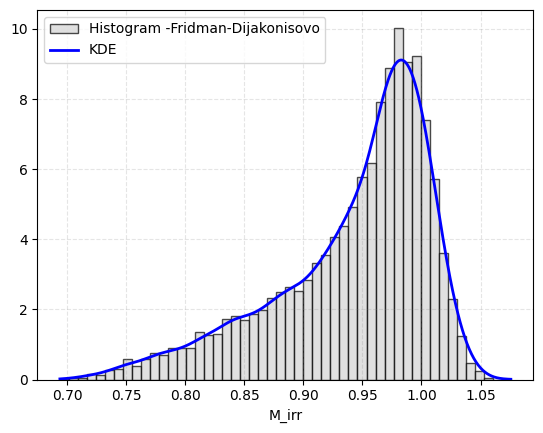

In [49]:
#sns.histplot(M_irr_samples, bins=50, stat='density', kde=True, palette='viridis')
plt.hist(M_irr_samples, bins=bins_fd, density=True, alpha=0.7,edgecolor ='black', color='lightgray', label='Histogram -Fridman-Dijakonisovo')

kde = stats.gaussian_kde(M_irr_samples)
x_vals = np.linspace(min(M_irr_samples), max(M_irr_samples), 1000)
plt.plot(x_vals, kde(x_vals), color='blue', linewidth=2,label='KDE')

plt.grid(visible=True, alpha=0.2, linestyle='--', color='gray')
plt.xlabel('M_irr')
plt.legend()
plt.show()

In [9]:
def pi_f(f):
    return 2 * (2 * f**2 - 1) / np.sqrt(1 - f**2)

# normalizacija funkcije
f_vred = np.linspace(1/np.sqrt(2)+1e-5, 1-1e-5, 1000)
pi_vred = pi_f(f_vred)
area_pi, _ = quad(pi_f, 1/np.sqrt(2), 1)

In [53]:
#Kolmogorov-Smirnov test
from scipy.stats import norm, ks_2samp

D_Mirr_vs_f = ks_2samp(M_irr_samples, f_samples).statistic
D_Mirr_vs_M = ks_2samp(M_irr_samples, M_samples).statistic

print(D_Mirr_vs_f)
print(D_Mirr_vs_M)

0.1551
0.5045


In [13]:
def p_Mirr(Mirr_val, mu, sigma):
    integrand = lambda f: (
        np.exp(-((Mirr_val / f - mu)**2) / (2 * sigma**2))
        * (2 * f**2 - 1) / (f * np.sqrt(1 - f**2))
    )
    const = np.sqrt(2 / np.pi) / sigma
    result = quad(integrand, 1/np.sqrt(2), 1)[0]
    return const * result

Mirr_range = np.linspace(min(M_irr_samples), max(M_irr_samples), 300)
pdf_theory = np.array([p_Mirr(x, mu, sigma) for x in Mirr_range])

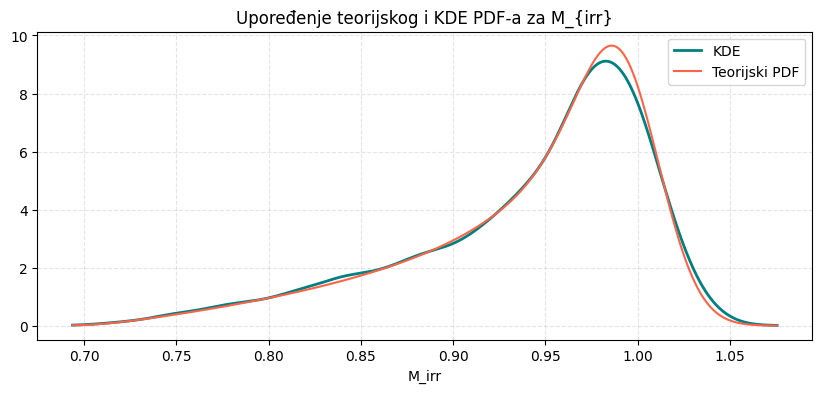

In [65]:
plt.figure(figsize=(10, 4))
#sns.kdeplot(M_irr_samples, label="KDE od M_{irr}")
plt.plot(x_vals, kde(x_vals), color='teal', linewidth=2,label='KDE')

plt.plot(Mirr_range, pdf_theory, color='tomato', label="Teorijski PDF")
plt.title("Upoređenje teorijskog i KDE PDF-a za M_{irr}")
plt.xlabel("M_irr")
plt.legend()
plt.grid(visible=True, alpha=0.2, linestyle='--', color='gray')
plt.show()

In [51]:
from tabulate import tabulate
#from IPython.display import Math
#display(Math(''))


# Podaci
table_data = [
    ["M_irr vs f", D_Mirr_vs_f],
    ["M_irr vs M", D_Mirr_vs_M],
    [r'Integracija pi(f)', area_pi]
]

# Kreiranje i prikaz tabele
headers = ["KS distanca od ", "vrednost"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+-------------------+------------+
| KS distanca od    |   vrednost |
+===================+============+
| M_irr vs f        |     0.1551 |
+-------------------+------------+
| M_irr vs M        |     0.5045 |
+-------------------+------------+
| Integracija pi(f) |     1      |
+-------------------+------------+
